# Air quality project

## Project and data description

### Project

czy potrzeba stacji więcej/ mniej. 

zrobić wizualizacje/ mapkę czy są zagęszone

Jak zwiększenie w konkretnych miejsacach wpłynie na zanieczyszczenie w pozostalych? 

jaka gęstość czujników? 

Jaka jest rzeźba terenu? Kraków jest w niecce. 

może być dla konkretnej daty

można agregować

min, max, średnia- na daną datę


### Data

The dataset consists air quality data (the concentrations of particulate matter PM1, PM2.5 and PM10, temperature, air pressure and humidity) from 2017 generated by network of 56 low-cost sensors located in Krakow, Poland.

### The goal

## Preprocessing and analysis

In [272]:
import glob
import os
import numpy as np
import pandas as pd
import folium
import random
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
def create_data_frame(path_to_files, file_name_end):
    all_data = []
    all_files = glob.glob(os.path.join(path_to_files,file_name_end))
    
    for path in all_files:
        frame = pd.read_csv(path)
        all_data.append(frame)
    
    df = pd.concat(all_data, axis=0, ignore_index=True)
    
    return df

In [3]:
root_path = r'C:\Users\User\PycharmProjects\Air_quality\Data_files'
file_name_like = '*2017.csv'

df = create_data_frame(root_path, file_name_like)

In [4]:
df

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-04-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,92.0,101906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,92.0,101869.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,94.0,101837.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,92.0,101834.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.0,94.0,101832.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8588,2017-09-30T19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,83.0,102373.0,...,102337.0,35.0,35.0,72.0,8.0,83.0,102383.0,37.0,36.0,67.0
8589,2017-09-30T20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,8.0,83.0,102374.0,...,102341.0,36.0,37.0,76.0,8.0,83.0,102391.0,37.0,37.0,69.0
8590,2017-09-30T21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7.0,90.0,102380.0,...,102349.0,38.0,39.0,79.0,6.0,90.0,102402.0,45.0,45.0,79.0
8591,2017-09-30T22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7.0,88.0,102380.0,...,102355.0,44.0,44.0,87.0,6.0,88.0,102408.0,46.0,46.0,79.0


In [5]:
def sort_by_column(frame, column_name):
    sorted_frame = frame.sort_values(by=column_name)
    sorded_frame = sorted_frame.reset_index(drop=True)
    
    return sorted_frame

In [6]:
df = sort_by_column(df, 'UTC time')
df

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
2713,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2714,2017-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2715,2017-01-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2716,2017-01-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2717,2017-01-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,2017-12-24T20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,87.0,101736.0,...,101726.0,12.0,15.0,31.0,5.0,85.0,101798.0,13.0,15.0,26.0
2037,2017-12-24T21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,88.0,101776.0,...,101771.0,12.0,14.0,29.0,5.0,85.0,101840.0,12.0,13.0,23.0
2038,2017-12-24T22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,85.0,101785.0,...,101788.0,10.0,12.0,26.0,5.0,82.0,101839.0,10.0,12.0,21.0
2039,2017-12-24T23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,88.0,101782.0,...,101774.0,9.0,11.0,24.0,5.0,85.0,101837.0,10.0,12.0,21.0


### Sensor location

In [7]:
def upload_sensor_frame(file_path):
    
    sensor_loc_path = file_path
    sensor_loc_df = pd.read_csv(sensor_loc_path)
    #sensor_loc_df.set_index('id', drop=True)
    
    return sensor_loc_df

In [8]:
sensor_loc_path = r'C:\Users\User\PycharmProjects\Air_quality\Data_files\sensor_locations.csv'
location_frame = upload_sensor_frame(sensor_loc_path)
#location_frame

In [9]:
area_kinds= ['residual', 'industrial', 'services_and_trade', 'recreation', 'transportation']

random_areas = random.choices(area_kinds, k=56)

location_frame['area_kind'] = random_areas

In [10]:
# location_frame

In [11]:
def create_a_map(start_point, zoom):

    sensor_loc_map = folium.Map(
                                location=start_point,
                                zoom_start= zoom
                              )
    return sensor_loc_map

In [12]:
location=[50.057748,19.961375]
initial_zoom=12

empty_map = create_a_map(location, initial_zoom)

In [13]:
def add_markers(location_df, my_map):
    for _, sensor in location_df.iterrows():
        if sensor['area_kind'] == 'industrial':
                icon_color = 'red'
        elif sensor['area_kind'] == 'residual':
                icon_color = 'yellow'
        elif sensor['area_kind'] == 'transportation':
                icon_color='gray'
        elif sensor['area_kind'] == 'services_and_trade':
                icon_color='blue'
        elif sensor['area_kind'] == 'recreation':
                icon_color='green'
        else:
            icon_color='blue'
        
        folium.Marker(location = [sensor['latitude'], sensor['longitude']],
                      #popup=sensor['id'],
                      tooltip=sensor['id'],
                      icon=folium.Icon(color=icon_color)
                     ).add_to(my_map)

    return my_map
        
sensor_map = add_markers(location_frame, empty_map)
sensor_map

C:\Users\User\AppData\Local\Temp\ipykernel_17092\1061587244.py:19: UserWarning: color argument of Icon should be one of: {'pink', 'cadetblue', 'lightgray', 'gray', 'lightred', 'lightgreen', 'lightblue', 'green', 'orange', 'purple', 'blue', 'white', 'darkpurple', 'darkred', 'beige', 'black', 'red', 'darkblue', 'darkgreen'}.
  icon=folium.Icon(color=icon_color)


In [14]:
sensor_map.save('Sensor_map.html')

### Data preparation

In [15]:
df = df.reset_index(drop=True)

In [16]:
df['UTC time'] = pd.to_datetime(df['UTC time'])

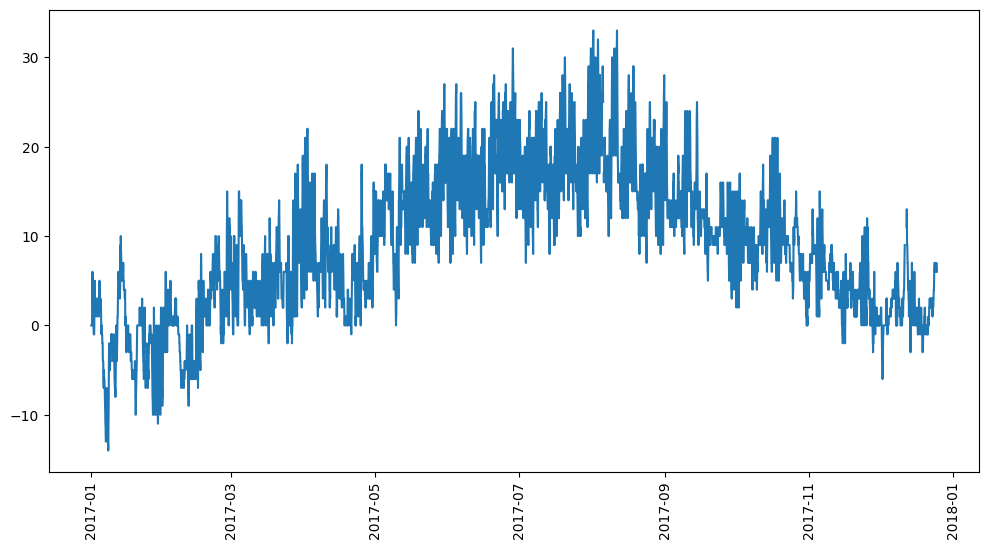

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
plt.locator_params(axis='x', nbins=20)
ax.plot(df['UTC time'], df['220_temperature'])
ax.xaxis.set_tick_params(rotation=90)
#plt.plot(df['UTC time'], df['3_temperature'])
plt.show()

# może być temp. średnia, albo dla dnia (też średnia)

In [18]:
df.head()

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def get_sensor_ids(data_frame):
    sensor_ids=[]
    for column in data_frame.columns:
        id = column.partition('_')[0]
        if id.isdigit():
            id = int(id)
            sensor_ids.append(id)
    ids = set(sensor_ids)
    ids = list(ids)
    # ids.sort()
    return ids

In [20]:
sensor_ids = get_sensor_ids(df)
# sensor_ids

In [21]:
# def get_columns(all_sensors_frame, sensor_list):
#     all_columns=[]
#     for sensor_id in sensor_list:
#         sensor_id = str(sensor_id)
#         sensor_columns = [column_name for column_name in all_sensors_frame.columns if column_name.startswith(sensor_id)]
#         all_columns.append(sensor_columns)
    
#     return all_columns

# all_columns = get_columns(df, sensor_ids)
# all_columns

In [22]:
def create_sensor_frame(all_sensors_frame, sensor_id):
    sensor_id = str(sensor_id)
    sensor_frame = all_sensors_frame.loc[:,all_sensors_frame.columns.str.startswith(sensor_id)]
    id_series = pd.Series(int(sensor_id), name='sensor_id', index=range(len(all_sensors_frame['UTC time'])))
    sensor_frame = pd.concat([id_series, all_sensors_frame['UTC time'], sensor_frame], axis=1)
    return sensor_frame

df_142 = create_sensor_frame(df, '142')
df_142

,sensor_id,UTC time,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10
0,142,2017-01-01 00:00:00,-4.0,68.0,102279.0,115.0,127.0,196.0
1,142,2017-01-01 01:00:00,-5.0,68.0,102228.0,105.0,116.0,180.0
2,142,2017-01-01 02:00:00,-5.0,66.0,102149.0,110.0,121.0,189.0
3,142,2017-01-01 03:00:00,-5.0,66.0,102097.0,107.0,118.0,184.0
4,142,2017-01-01 04:00:00,-5.0,65.0,102047.0,112.0,123.0,193.0
...,...,...,...,...,...,...,...,...
8588,142,2017-12-24 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8589,142,2017-12-24 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8590,142,2017-12-24 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8591,142,2017-12-24 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
def all_sensor_frames(all_data_frame, sensor_list):
    frame_list=[]
    for sensor_id in sensor_list:
        sensor_frame = create_sensor_frame(all_data_frame, sensor_id)
        frame_list.append(sensor_frame)
    return frame_list

In [24]:
def all_sensor_dict(all_data_frame, sensor_list):
    frame_dictionary = {}
    for sensor_id in sensor_list:
        frame_dictionary[sensor_id] = create_sensor_frame(all_data_frame, sensor_id)
    return frame_dictionary

In [25]:
sensor_dict = all_sensor_dict(df, sensor_ids)

In [26]:
# sensor_frames = all_sensor_frames(df, sensor_ids)
# sensor_frames

In [27]:
sensor_dict[192]

,sensor_id,UTC time,192_temperature,192_humidity,192_pressure,192_pm1,192_pm25,192_pm10
0,192,2017-01-01 00:00:00,0.0,24.0,102268.0,129.0,151.0,223.0
1,192,2017-01-01 01:00:00,0.0,24.0,102215.0,147.0,175.0,259.0
2,192,2017-01-01 02:00:00,-1.0,24.0,102135.0,159.0,192.0,282.0
3,192,2017-01-01 03:00:00,-1.0,24.0,102082.0,154.0,185.0,273.0
4,192,2017-01-01 04:00:00,-1.0,24.0,102035.0,148.0,178.0,263.0
...,...,...,...,...,...,...,...,...
8588,192,2017-12-24 20:00:00,6.0,88.0,101734.0,14.0,16.0,25.0
8589,192,2017-12-24 21:00:00,5.0,88.0,101772.0,12.0,14.0,23.0
8590,192,2017-12-24 22:00:00,5.0,85.0,101764.0,11.0,12.0,20.0
8591,192,2017-12-24 23:00:00,5.0,88.0,101757.0,10.0,12.0,19.0


## Data analysis

### About the data

- Temperature: Celcius degrees
- Pressure: 

Converting pressure in Pascals to hectopascals

In [28]:
df_142['142_pressure'] = (df_142['142_pressure']/100)
df_142

,sensor_id,UTC time,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10
0,142,2017-01-01 00:00:00,-4.0,68.0,1022.79,115.0,127.0,196.0
1,142,2017-01-01 01:00:00,-5.0,68.0,1022.28,105.0,116.0,180.0
2,142,2017-01-01 02:00:00,-5.0,66.0,1021.49,110.0,121.0,189.0
3,142,2017-01-01 03:00:00,-5.0,66.0,1020.97,107.0,118.0,184.0
4,142,2017-01-01 04:00:00,-5.0,65.0,1020.47,112.0,123.0,193.0
...,...,...,...,...,...,...,...,...
8588,142,2017-12-24 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8589,142,2017-12-24 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8590,142,2017-12-24 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8591,142,2017-12-24 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_142.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 non-null   datetime64[ns]
 2   142_temperature  2066 non-null   float64       
 3   142_humidity     2065 non-null   float64       
 4   142_pressure     2041 non-null   float64       
 5   142_pm1          1990 non-null   float64       
 6   142_pm25         1990 non-null   float64       
 7   142_pm10         1990 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 537.2 KB


In [30]:
for sensor_id in sensor_dict:
    sensor_dict[sensor_id].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sensor_id      8593 non-null   int64         
 1   UTC time       8593 non-null   datetime64[ns]
 2   3_temperature  206 non-null    float64       
 3   3_humidity     206 non-null    float64       
 4   3_pressure     1178 non-null   float64       
 5   3_pm1          1235 non-null   float64       
 6   3_pm25         1235 non-null   float64       
 7   3_pm10         1235 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 537.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 non-null   datetime64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 non-null   datetime64[ns]
 2   216_temperature  4519 non-null   float64       
 3   216_humidity     4517 non-null   float64       
 4   216_pressure     4496 non-null   float64       
 5   216_pm1          4519 non-null   float64       
 6   216_pm25         4519 non-null   float64       
 7   216_pm10         4519 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 537.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 n

Wiele czujników ma znacznie więcej wartości brakujących niż wartości zmierzonych. 

In [31]:
def number_of_Nans(data_frame):
    print('Liczba brakujących wartości w poszczególnych kolumnach:')
    column_names = data_frame.columns
    for column in column_names:
        print(column,': ', ((data_frame[column].isnull().sum())/len(data_frame[column])).round(2))

In [32]:
for sensor_id in sensor_dict:
    number_of_Nans(sensor_dict[sensor_id])

Liczba brakujących wartości w poszczególnych kolumnach:
sensor_id :  0.0
UTC time :  0.0
3_temperature :  0.98
3_humidity :  0.98
3_pressure :  0.86
3_pm1 :  0.86
3_pm25 :  0.86
3_pm10 :  0.86
Liczba brakujących wartości w poszczególnych kolumnach:
sensor_id :  0.0
UTC time :  0.0
263_temperature :  0.02
263_humidity :  0.02
263_pressure :  0.02
263_pm1 :  0.02
263_pm25 :  0.02
263_pm10 :  0.02
Liczba brakujących wartości w poszczególnych kolumnach:
sensor_id :  0.0
UTC time :  0.0
140_temperature :  0.24
140_humidity :  0.24
140_pressure :  0.22
140_pm1 :  0.23
140_pm25 :  0.23
140_pm10 :  0.23
Liczba brakujących wartości w poszczególnych kolumnach:
sensor_id :  0.0
UTC time :  0.0
142_temperature :  0.76
142_humidity :  0.76
142_pressure :  0.76
142_pm1 :  0.77
142_pm25 :  0.77
142_pm10 :  0.77
Liczba brakujących wartości w poszczególnych kolumnach:
sensor_id :  0.0
UTC time :  0.0
147_temperature :  0.73
147_humidity :  0.73
147_pressure :  0.08
147_pm1 :  0.07
147_pm25 :  0.07
147_

Tworzymy funkcję, która działa na pojedyńczej ramce danych (jednego czujnika)

In [33]:
def high_nans_ratio(data_frame):
    #print('Liczba brakujących wartości w poszczególnych kolumnach:')
    column_names = data_frame.columns
    for column in column_names:
        nan_ratio = ((data_frame[column].isnull().sum())/len(data_frame[column])).round(2)
        if nan_ratio > 0.5:
            print(column,': ', nan_ratio)

Tworzymy funkcję, która uruchamia funkcję działającą na pojedyńczej ramce danych, na wszystkie ramki danych na liście. 

In [34]:
def apply_function(dict_of_frames, function):
    for sensor_id in dict_of_frames:
        function(dict_of_frames[sensor_id])

In [35]:
apply_function(sensor_dict, high_nans_ratio)

3_temperature :  0.98
3_humidity :  0.98
3_pressure :  0.86
3_pm1 :  0.86
3_pm25 :  0.86
3_pm10 :  0.86
142_temperature :  0.76
142_humidity :  0.76
142_pressure :  0.76
142_pm1 :  0.77
142_pm25 :  0.77
142_pm10 :  0.77
147_temperature :  0.73
147_humidity :  0.73
808_temperature :  0.87
808_humidity :  0.87
808_pressure :  0.87
808_pm1 :  0.87
808_pm25 :  0.87
808_pm10 :  0.87
172_temperature :  0.81
172_humidity :  0.81
176_pressure :  0.8
178_temperature :  0.77
178_humidity :  0.77
178_pressure :  1.0
178_pm1 :  0.77
178_pm25 :  0.77
178_pm10 :  0.77
179_pressure :  0.82
180_pressure :  0.8
181_pressure :  0.8
182_pressure :  0.8
183_pressure :  0.89
184_pressure :  0.8
185_pressure :  0.83
187_temperature :  0.72
187_humidity :  0.72
187_pressure :  0.72
187_pm1 :  0.72
187_pm25 :  0.72
187_pm10 :  0.72
196_pressure :  0.8
201_pressure :  0.8
203_pressure :  1.0
205_temperature :  0.71
205_humidity :  0.71
205_pressure :  0.84
205_pm1 :  0.71
205_pm25 :  0.71
205_pm10 :  0.71
713_

Odrzucamy te czujniki, gdzie braki w danych we wszystkich kolumnach przekraczają 50 %.

In [36]:
# def high_nans_removal(data_frame_dict):
#     dropped_frames_miss_6 = {}
#     new_data_frame_dict = {}
#     for k, frame in enumerate(data_frame_dict):
#         n_missing_cols = (frame.isna().sum() / len(frame) > 0.45).sum()
        
#         if n_missing_cols == 6:
#             dropped_frames_miss_6[.append(frame)
#         else:
#             new_data_frame_list.append(frame)
            
#     return new_data_frame_list, dropped_frames_miss_6

In [37]:
def high_nans_removal(data_frame_dict):
    dropped_frames_miss_6 = {}
    new_data_frame_dict = {}
    for dict_key in sensor_dict:
    #for k, frame in enumerate(data_frame_dict):
        n_missing_cols = (sensor_dict[dict_key].isna().sum() / len(sensor_dict[dict_key]) > 0.45).sum()
        
        if n_missing_cols == 6:
            dropped_frames_miss_6[dict_key]=sensor_dict[dict_key]
        else:
            #new_data_frame_list.append(frame)
            new_data_frame_dict[dict_key]=sensor_dict[dict_key]
            
    return new_data_frame_dict, dropped_frames_miss_6

In [38]:
n_missing_cols = (sensor_dict[3].isna().sum()/len(sensor_dict[3])>0.45).sum()
n_missing_cols

6

In [39]:
dropped_frames_miss_6 = {}
new_data_frame_dict = {}
if n_missing_cols == 6:
            dropped_frames_miss_6[3]=sensor_dict[3]
else:
            new_data_frame_dict[3]=sensor_dict[3]
dropped_frames_miss_6

{3:       sensor_id            UTC time  3_temperature  3_humidity  3_pressure  \
 0             3 2017-01-01 00:00:00            NaN         NaN         NaN   
 1             3 2017-01-01 01:00:00            NaN         NaN         NaN   
 2             3 2017-01-01 02:00:00            NaN         NaN         NaN   
 3             3 2017-01-01 03:00:00            NaN         NaN         NaN   
 4             3 2017-01-01 04:00:00            NaN         NaN         NaN   
 ...         ...                 ...            ...         ...         ...   
 8588          3 2017-12-24 20:00:00            NaN         NaN         NaN   
 8589          3 2017-12-24 21:00:00            NaN         NaN         NaN   
 8590          3 2017-12-24 22:00:00            NaN         NaN         NaN   
 8591          3 2017-12-24 23:00:00            NaN         NaN         NaN   
 8592          3 2017-12-25 00:00:00            NaN         NaN         NaN   
 
       3_pm1  3_pm25  3_pm10  
 0       NaN    

In [40]:
new_sensor_dict, dropped_frames = high_nans_removal(sensor_dict)

In [41]:
new_sensor_dict

{263:       sensor_id            UTC time  263_temperature  263_humidity  \
 0           263 2017-01-01 00:00:00              0.0          54.0   
 1           263 2017-01-01 01:00:00              0.0          52.0   
 2           263 2017-01-01 02:00:00              0.0          49.0   
 3           263 2017-01-01 03:00:00              0.0          47.0   
 4           263 2017-01-01 04:00:00              0.0          47.0   
 ...         ...                 ...              ...           ...   
 8588        263 2017-12-24 20:00:00              6.0          85.0   
 8589        263 2017-12-24 21:00:00              5.0          85.0   
 8590        263 2017-12-24 22:00:00              5.0          83.0   
 8591        263 2017-12-24 23:00:00              5.0          85.0   
 8592        263 2017-12-25 00:00:00              5.0          85.0   
 
       263_pressure  263_pm1  263_pm25  263_pm10  
 0         101672.0    137.0     153.0     235.0  
 1         101623.0    119.0     132.0 

In [42]:
apply_function(new_sensor_dict, high_nans_ratio)

147_temperature :  0.73
147_humidity :  0.73
172_temperature :  0.81
172_humidity :  0.81
176_pressure :  0.8
179_pressure :  0.82
180_pressure :  0.8
181_pressure :  0.8
182_pressure :  0.8
183_pressure :  0.89
184_pressure :  0.8
185_pressure :  0.83
196_pressure :  0.8
201_pressure :  0.8
203_pressure :  1.0


In [43]:
apply_function(dropped_frames, high_nans_ratio)

3_temperature :  0.98
3_humidity :  0.98
3_pressure :  0.86
3_pm1 :  0.86
3_pm25 :  0.86
3_pm10 :  0.86
142_temperature :  0.76
142_humidity :  0.76
142_pressure :  0.76
142_pm1 :  0.77
142_pm25 :  0.77
142_pm10 :  0.77
808_temperature :  0.87
808_humidity :  0.87
808_pressure :  0.87
808_pm1 :  0.87
808_pm25 :  0.87
808_pm10 :  0.87
178_temperature :  0.77
178_humidity :  0.77
178_pressure :  1.0
178_pm1 :  0.77
178_pm25 :  0.77
178_pm10 :  0.77
187_temperature :  0.72
187_humidity :  0.72
187_pressure :  0.72
187_pm1 :  0.72
187_pm25 :  0.72
187_pm10 :  0.72
205_temperature :  0.71
205_humidity :  0.71
205_pressure :  0.84
205_pm1 :  0.71
205_pm25 :  0.71
205_pm10 :  0.71
713_temperature :  0.68
713_humidity :  0.68
713_pressure :  0.65
713_pm1 :  0.65
713_pm25 :  0.65
713_pm10 :  0.65
211_temperature :  0.83
211_humidity :  0.83
211_pressure :  0.83
211_pm1 :  0.83
211_pm25 :  0.83
211_pm10 :  0.83
213_temperature :  0.54
213_humidity :  0.54
213_pressure :  0.53
213_pm1 :  0.53
213

In [44]:
# def display_frame(search_id, list_of_frames):
#     for i, k in enumerate(list_of_frames):
#         if list_of_frames[i]['sensor_id'][i] == search_id:
#             print (list_of_frames[i]['sensor_id'][i]," : ", i)
#             #display(list_of_frames[i])

**Czujnik nr 172 ma powyżej 80 % braków w pomiarze temperatury i wilgotności. Najbliżej niego znajduje się czujnik nr 170, który posiada większość kompletnych danych. Ze względu na przewidywaną niewielką różnicę pomiędzy rzeczywistymi wartościami temperatury i wilgotności kopiujemy dane z czujnika 170 do czujnika 172.** 

In [45]:
new_sensor_dict[172].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 non-null   datetime64[ns]
 2   172_temperature  1596 non-null   float64       
 3   172_humidity     1596 non-null   float64       
 4   172_pressure     8363 non-null   float64       
 5   172_pm1          8388 non-null   float64       
 6   172_pm25         8388 non-null   float64       
 7   172_pm10         8388 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 537.2 KB


In [46]:
new_sensor_dict[172]['172_temperature'] = new_sensor_dict[170]['170_temperature']

In [47]:
new_sensor_dict[172]['172_humidity'] = new_sensor_dict[170]['170_humidity']

**Analogiczne podejście stosujemy w przypadku braków temperatury, wilgotności i ciśnienia w innych czujnikach.**

**Przy wyborze czujników zwracamy też uwagę na otoczenie.**

 

In [48]:
new_sensor_dict[196]['196_pressure'].isna().sum()

6863

In [49]:
new_sensor_dict[196]['196_pressure'] = new_sensor_dict[214]['214_pressure']

In [50]:
new_sensor_dict[196]['196_pressure'].isna().sum()

67

In [51]:
new_sensor_dict[180]['180_pressure'].isna().sum()

6855

In [52]:
new_sensor_dict[180]['180_pressure'] = new_sensor_dict[223]['223_pressure']

In [53]:
new_sensor_dict[180]['180_pressure'].isna().sum()

116

In [54]:
new_sensor_dict[201]['201_pressure'].isna().sum()

6854

In [55]:
new_sensor_dict[201]['201_pressure'] = new_sensor_dict[196]['196_pressure']

In [56]:
new_sensor_dict[201]['201_pressure'].isna().sum()

67

In [57]:
new_sensor_dict[179]['179_pressure'].isna().sum()

7020

In [58]:
new_sensor_dict[179]['179_pressure'] = new_sensor_dict[220]['220_pressure']

In [59]:
new_sensor_dict[179]['179_pressure'].isna().sum()

57

In [60]:
new_sensor_dict[147]['147_temperature'].isna().sum()

6292

In [61]:
new_sensor_dict[147]['147_humidity'].isna().sum()

6294

In [62]:
new_sensor_dict[147]['147_temperature'] = new_sensor_dict[189]['189_temperature']
new_sensor_dict[147]['147_humidity'] = new_sensor_dict[189]['189_humidity']

In [63]:
new_sensor_dict[147]['147_temperature'].isna().sum(), new_sensor_dict[147]['147_humidity'].isna().sum()

(131, 133)

In [64]:
new_sensor_dict[184]['184_pressure'].isna().sum()

6860

In [65]:
new_sensor_dict[184]['184_pressure'] = new_sensor_dict[173]['173_pressure']

In [66]:
new_sensor_dict[184]['184_pressure'].isna().sum()

119

In [67]:
new_sensor_dict[182]['182_pressure'].isna().sum()

6892

In [68]:
new_sensor_dict[182]['182_pressure'] = new_sensor_dict[180]['180_pressure']

In [69]:
new_sensor_dict[182]['182_pressure'].isna().sum()

116

In [70]:
new_sensor_dict[176]['176_pressure'].isna().sum()

6854

In [71]:
new_sensor_dict[176]['176_pressure'] = new_sensor_dict[147]['147_pressure']

In [72]:
new_sensor_dict[176]['176_pressure'].isna().sum()

653

In [73]:
new_sensor_dict[183]['183_pressure'].isna().sum()

7639

In [74]:
new_sensor_dict[183]['183_pressure'] = new_sensor_dict[209]['209_pressure']

In [75]:
new_sensor_dict[183]['183_pressure'].isna().sum()

792

In [76]:
new_sensor_dict[181]['181_pressure'].isna().sum()

6859

In [77]:
new_sensor_dict[181]['181_pressure'] = new_sensor_dict[204]['204_pressure']

In [78]:
new_sensor_dict[181]['181_pressure'].isna().sum()

77

In [79]:
new_sensor_dict[203]['203_pressure'].isna().sum()

8593

In [80]:
new_sensor_dict[203]['203_pressure'] = new_sensor_dict[194]['194_pressure']

In [81]:
new_sensor_dict[203]['203_pressure'].isna().sum()

288

In [82]:
new_sensor_dict[185]['185_pressure'].isna().sum()

7135

In [83]:
new_sensor_dict[185]['185_pressure'] = new_sensor_dict[192]['192_pressure']

In [84]:
new_sensor_dict[185]['185_pressure'].isna().sum()

234

In [85]:
def nans_ratio(data_frame):
    column_names = data_frame.columns
    for column in column_names:
        nan_ratio = ((data_frame[column].isnull().sum())/len(data_frame[column])).round(2)
        print(column,': ', nan_ratio)

In [86]:
apply_function(new_sensor_dict, nans_ratio)

sensor_id :  0.0
UTC time :  0.0
263_temperature :  0.02
263_humidity :  0.02
263_pressure :  0.02
263_pm1 :  0.02
263_pm25 :  0.02
263_pm10 :  0.02
sensor_id :  0.0
UTC time :  0.0
140_temperature :  0.24
140_humidity :  0.24
140_pressure :  0.22
140_pm1 :  0.23
140_pm25 :  0.23
140_pm10 :  0.23
sensor_id :  0.0
UTC time :  0.0
147_temperature :  0.02
147_humidity :  0.02
147_pressure :  0.08
147_pm1 :  0.07
147_pm25 :  0.07
147_pm10 :  0.07
sensor_id :  0.0
UTC time :  0.0
169_temperature :  0.04
169_humidity :  0.04
169_pressure :  0.04
169_pm1 :  0.04
169_pm25 :  0.04
169_pm10 :  0.04
sensor_id :  0.0
UTC time :  0.0
170_temperature :  0.02
170_humidity :  0.02
170_pressure :  0.02
170_pm1 :  0.02
170_pm25 :  0.02
170_pm10 :  0.02
sensor_id :  0.0
UTC time :  0.0
171_temperature :  0.01
171_humidity :  0.01
171_pressure :  0.01
171_pm1 :  0.01
171_pm25 :  0.01
171_pm10 :  0.01
sensor_id :  0.0
UTC time :  0.0
172_temperature :  0.02
172_humidity :  0.02
172_pressure :  0.03
172_pm1

In [87]:
def nans_ratio_above_10proc(data_frame):
    #print('Liczba brakujących wartości w poszczególnych kolumnach:')
    column_names = data_frame.columns
    for column in column_names:
        nan_ratio = ((data_frame[column].isnull().sum())/len(data_frame[column])).round(2)
        if nan_ratio > 0.1:
            print(column,': ', nan_ratio)

In [88]:
apply_function(new_sensor_dict, nans_ratio_above_10proc)

140_temperature :  0.24
140_humidity :  0.24
140_pressure :  0.22
140_pm1 :  0.23
140_pm25 :  0.23
140_pm10 :  0.23
174_temperature :  0.14
174_humidity :  0.14
174_pressure :  0.14
174_pm1 :  0.14
174_pm25 :  0.14
174_pm10 :  0.14
177_pressure :  0.35
182_temperature :  0.12
182_humidity :  0.12
182_pm1 :  0.12
182_pm25 :  0.12
182_pm10 :  0.12
195_temperature :  0.15
195_humidity :  0.15
195_pressure :  0.16
195_pm1 :  0.15
195_pm25 :  0.15
195_pm10 :  0.15
203_temperature :  0.18
203_humidity :  0.18
203_pm1 :  0.18
203_pm25 :  0.18
203_pm10 :  0.18
622_temperature :  0.38
622_humidity :  0.38
622_pressure :  0.35
622_pm1 :  0.35
622_pm25 :  0.35
622_pm10 :  0.35
895_temperature :  0.37
895_humidity :  0.37
895_pressure :  0.26
895_pm1 :  0.26
895_pm25 :  0.26
895_pm10 :  0.26


In [89]:
def nans_ratio_below_2proc(data_frame):
    #print('Liczba brakujących wartości w poszczególnych kolumnach:')
    column_names = data_frame.columns
    for column in column_names:
        nan_ratio = ((data_frame[column].isnull().sum())/len(data_frame[column])).round(2)
        if nan_ratio < 0.015:
            print(column,': ', nan_ratio)

In [90]:
apply_function(new_sensor_dict, nans_ratio_below_2proc)

sensor_id :  0.0
UTC time :  0.0
sensor_id :  0.0
UTC time :  0.0
sensor_id :  0.0
UTC time :  0.0
sensor_id :  0.0
UTC time :  0.0
sensor_id :  0.0
UTC time :  0.0
sensor_id :  0.0
UTC time :  0.0
171_temperature :  0.01
171_humidity :  0.01
171_pressure :  0.01
171_pm1 :  0.01
171_pm25 :  0.01
171_pm10 :  0.01
sensor_id :  0.0
UTC time :  0.0
sensor_id :  0.0
UTC time :  0.0
173_pressure :  0.01
173_pm1 :  0.01
173_pm25 :  0.01
173_pm10 :  0.01
sensor_id :  0.0
UTC time :  0.0
sensor_id :  0.0
UTC time :  0.0
176_temperature :  0.01
176_humidity :  0.01
176_pm1 :  0.01
176_pm25 :  0.01
176_pm10 :  0.01
sensor_id :  0.0
UTC time :  0.0
sensor_id :  0.0
UTC time :  0.0
179_pressure :  0.01
sensor_id :  0.0
UTC time :  0.0
180_temperature :  0.0
180_humidity :  0.0
180_pressure :  0.01
180_pm1 :  0.0
180_pm25 :  0.0
180_pm10 :  0.0
sensor_id :  0.0
UTC time :  0.0
181_pressure :  0.01
sensor_id :  0.0
UTC time :  0.0
182_pressure :  0.01
sensor_id :  0.0
UTC time :  0.0
sensor_id :  0.0

In [91]:
def nan_ratio_for_frame(sensor_dictionary):
    nan_ratio_sums = {}
    for key in sensor_dictionary:
        column_names = sensor_dictionary[key].columns
        nan_ratio_sum = 0
        for column in column_names:
            nan_ratio= ((sensor_dictionary[key][column].isnull().sum())/(len(sensor_dictionary[key][column])))
            nan_ratio_sum += nan_ratio
        nan_ratio_sums[key] = nan_ratio_sum
    return nan_ratio_sums

In [92]:
nan_results = nan_ratio_for_frame(new_sensor_dict)

In [216]:
def ten_min_values(ratio_sums_dict):
    top_10_values = sorted(ratio_sums_dict.values())[:10]
    final_score = []
    for value in top_10_values:
        for key in ratio_sums_dict:
            if ratio_sums_dict[key] == value:
                final_score.append(key)
    return set(final_score) 

In [94]:
min_nan_ratio_sensors = ten_min_values(nan_results)
min_nan_ratio_sensors

[212, 226, 220, 214, 221, 214, 221, 180, 218, 204, 228, 171]

In [95]:
new_sensor_dict[212]

,sensor_id,UTC time,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10
0,212,2017-01-01 00:00:00,0.0,29.0,101435.0,107.0,123.0,196.0
1,212,2017-01-01 01:00:00,0.0,28.0,101387.0,123.0,144.0,227.0
2,212,2017-01-01 02:00:00,0.0,28.0,101302.0,120.0,140.0,224.0
3,212,2017-01-01 03:00:00,0.0,27.0,101250.0,104.0,119.0,190.0
4,212,2017-01-01 04:00:00,0.0,25.0,101204.0,88.0,100.0,161.0
...,...,...,...,...,...,...,...,...
8588,212,2017-12-24 20:00:00,6.0,77.0,101624.0,10.0,11.0,19.0
8589,212,2017-12-24 21:00:00,5.0,77.0,101659.0,9.0,10.0,18.0
8590,212,2017-12-24 22:00:00,5.0,74.0,101658.0,7.0,8.0,15.0
8591,212,2017-12-24 23:00:00,5.0,77.0,101649.0,7.0,8.0,14.0


In [96]:
column_name = str(212) + '_pressure'
column_name

'212_pressure'

In [97]:
def pascals_to_hectopascals(sensors_dictionary):
    for key in sensors_dictionary:
        column_name = str(key) + '_pressure'
        new_sensor_dict[key][column_name] = new_sensor_dict[key][column_name]/100

In [98]:
pascals_to_hectopascals(new_sensor_dict)

In [99]:
new_sensor_dict[212]

,sensor_id,UTC time,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10
0,212,2017-01-01 00:00:00,0.0,29.0,1014.35,107.0,123.0,196.0
1,212,2017-01-01 01:00:00,0.0,28.0,1013.87,123.0,144.0,227.0
2,212,2017-01-01 02:00:00,0.0,28.0,1013.02,120.0,140.0,224.0
3,212,2017-01-01 03:00:00,0.0,27.0,1012.50,104.0,119.0,190.0
4,212,2017-01-01 04:00:00,0.0,25.0,1012.04,88.0,100.0,161.0
...,...,...,...,...,...,...,...,...
8588,212,2017-12-24 20:00:00,6.0,77.0,1016.24,10.0,11.0,19.0
8589,212,2017-12-24 21:00:00,5.0,77.0,1016.59,9.0,10.0,18.0
8590,212,2017-12-24 22:00:00,5.0,74.0,1016.58,7.0,8.0,15.0
8591,212,2017-12-24 23:00:00,5.0,77.0,1016.49,7.0,8.0,14.0


In [100]:
new_sensor_dict[212].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 non-null   datetime64[ns]
 2   212_temperature  8585 non-null   float64       
 3   212_humidity     8584 non-null   float64       
 4   212_pressure     8560 non-null   float64       
 5   212_pm1          8585 non-null   float64       
 6   212_pm25         8585 non-null   float64       
 7   212_pm10         8585 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 537.2 KB


In [142]:
new_sensor_dict[212].loc[546:548,:]

,sensor_id,UTC time,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10
546,212,2017-01-23 18:00:00,-3.0,34.0,1013.02,119.0,138.0,218.0
547,212,2017-01-23 19:00:00,-3.0,NaN,NaN,NaN,NaN,NaN
548,212,2017-01-23 20:00:00,-4.0,30.0,1013.64,114.0,134.0,213.0


In [147]:
# shows all rows with nan in any column
new_sensor_dict[212][new_sensor_dict[212].isna().any(axis=1)]

,sensor_id,UTC time,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10
547,212,2017-01-23 19:00:00,-3.0,NaN,NaN,NaN,NaN,NaN
1189,212,2017-02-19 13:00:00,4.0,81.0,NaN,19.0,15.0,27.0
1190,212,2017-02-19 14:00:00,3.0,79.0,NaN,27.0,25.0,43.0
1191,212,2017-02-19 15:00:00,3.0,78.0,NaN,32.0,31.0,53.0
1192,212,2017-02-19 16:00:00,3.0,76.0,NaN,32.0,32.0,53.0
1193,212,2017-02-19 17:00:00,1.0,76.0,NaN,31.0,30.0,51.0
1194,212,2017-02-19 18:00:00,1.0,76.0,NaN,32.0,31.0,53.0
1195,212,2017-02-19 19:00:00,0.0,75.0,NaN,38.0,39.0,66.0
1196,212,2017-02-19 20:00:00,0.0,75.0,NaN,49.0,51.0,82.0
1197,212,2017-02-19 21:00:00,0.0,74.0,NaN,63.0,68.0,99.0


In [203]:
# temperature = new_sensor_dict[212]['212_temperature']


# for index, value in enumerate(temperature):
#     print(type(value))
#     if np.isnan(value) and index !=0:
#         prev_val = temperature[index-1]
#         print(prev_val)
#         temperature[index]=prev_val

In [208]:
def replace_nan_with_prev(data_frame):
    for column in data_frame:
        if column[0:3].isdigit():
            for index, value in enumerate(data_frame[column]):
                float(value)
                if np.isnan([value]) and index !=0:
                    prev_val = data_frame[column][index-1]
                    data_frame[column][index]=prev_val

In [148]:
# sensors chosen to model
min_nan_ratio_sensors

[212, 226, 220, 214, 221, 214, 221, 180, 218, 204, 228, 171]

In [199]:
replace_nan_with_prev(new_sensor_dict[212])

In [200]:
new_sensor_dict[212][new_sensor_dict[212].isna().any(axis=1)]

,sensor_id,UTC time,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10


In [205]:
new_sensor_dict[226][new_sensor_dict[226].isna().any(axis=1)]

,sensor_id,UTC time,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10
1189,226,2017-02-19 13:00:00,3.0,82.0,NaN,21.0,17.0,30.0
1190,226,2017-02-19 14:00:00,3.0,81.0,NaN,28.0,26.0,43.0
1191,226,2017-02-19 15:00:00,3.0,81.0,NaN,29.0,28.0,46.0
1192,226,2017-02-19 16:00:00,2.0,78.0,NaN,19.0,15.0,26.0
1193,226,2017-02-19 17:00:00,1.0,78.0,NaN,23.0,20.0,33.0
1194,226,2017-02-19 18:00:00,1.0,79.0,NaN,35.0,34.0,58.0
1195,226,2017-02-19 19:00:00,0.0,79.0,NaN,43.0,43.0,71.0
1196,226,2017-02-19 20:00:00,0.0,78.0,NaN,54.0,55.0,88.0
1197,226,2017-02-19 21:00:00,0.0,77.0,NaN,54.0,56.0,89.0
1198,226,2017-02-19 22:00:00,0.0,78.0,NaN,56.0,58.0,91.0


In [206]:
replace_nan_with_prev(new_sensor_dict[226])

3.0
3.0
3.0
3.0
3.0
15.0
19.0
19.0
23.0
23.0
23.0
23.0
3.0
3.0
85.0
85.0
89.0
89.0
89.0
89.0
89.0
82.0
44.0
44.0
28.0
28.0
28.0
28.0
77.0
77.0
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1018.74
1023.22
1023.22
1023.22
1023.22
1023.22
1007.65
1015.13
1015.13
1016.03
1016.03
1016.03
1016.03
1015.23
1015.23
52.0
52.0
52.0
52.0
52.0
19.0
6.0
6.0
3.0
3.0
3.0
3.0
1.0
9.0
9.0
51.0
51.0
51.0
51.0
51.0
19.0
5.0
5.0
2.0
2.0
2.0
2.0
8.0
8.0
82.0
82.0
82.0
82.0
82.0
24.0
9.0
9.0
5.0
5.0
5.0
5.0
13.0
13.0


C:\Users\User\AppData\Local\Temp\ipykernel_17092\2705195083.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column][index]=prev_val


In [207]:
new_sensor_dict[226][new_sensor_dict[226].isna().any(axis=1)]

,sensor_id,UTC time,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10


In [209]:
new_sensor_dict[220][new_sensor_dict[220].isna().any(axis=1)]

,sensor_id,UTC time,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10
547,220,2017-01-23 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1189,220,2017-02-19 13:00:00,4.0,79.0,NaN,23.0,20.0,34.0
1190,220,2017-02-19 14:00:00,4.0,78.0,NaN,36.0,35.0,58.0
1191,220,2017-02-19 15:00:00,3.0,79.0,NaN,34.0,33.0,56.0
1192,220,2017-02-19 16:00:00,2.0,76.0,NaN,31.0,30.0,51.0
1193,220,2017-02-19 17:00:00,1.0,76.0,NaN,33.0,32.0,54.0
1194,220,2017-02-19 18:00:00,1.0,76.0,NaN,36.0,36.0,60.0
1195,220,2017-02-19 19:00:00,0.0,76.0,NaN,47.0,47.0,79.0
1196,220,2017-02-19 20:00:00,0.0,75.0,NaN,51.0,52.0,86.0
1197,220,2017-02-19 21:00:00,0.0,75.0,NaN,66.0,67.0,100.0


**dopytać o tę uwagę**

In [210]:
replace_nan_with_prev(new_sensor_dict[220])

C:\Users\User\AppData\Local\Temp\ipykernel_17092\1483693759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column][index]=prev_val


In [211]:
new_sensor_dict[220][new_sensor_dict[220].isna().any(axis=1)]

,sensor_id,UTC time,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10


In [215]:
set(min_nan_ratio_sensors)

{171, 180, 204, 212, 214, 218, 220, 221, 226, 228}

In [221]:
pd.set_option('display.max_rows',200)

In [222]:
new_sensor_dict[171][new_sensor_dict[171].isna().any(axis=1)]

,sensor_id,UTC time,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10
547,171,2017-01-23 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1189,171,2017-02-19 13:00:00,4.0,81.0,NaN,25.0,22.0,37.0
1190,171,2017-02-19 14:00:00,4.0,79.0,NaN,28.0,26.0,46.0
1191,171,2017-02-19 15:00:00,4.0,78.0,NaN,34.0,33.0,56.0
1192,171,2017-02-19 16:00:00,3.0,76.0,NaN,32.0,30.0,52.0
1193,171,2017-02-19 17:00:00,1.0,76.0,NaN,30.0,29.0,48.0
1194,171,2017-02-19 18:00:00,1.0,76.0,NaN,37.0,36.0,61.0
1195,171,2017-02-19 19:00:00,1.0,76.0,NaN,46.0,46.0,76.0
1196,171,2017-02-19 20:00:00,0.0,74.0,NaN,54.0,55.0,86.0
1197,171,2017-02-19 21:00:00,0.0,75.0,NaN,68.0,71.0,103.0


In [223]:
replace_nan_with_prev(new_sensor_dict[171])

C:\Users\User\AppData\Local\Temp\ipykernel_17092\1483693759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column][index]=prev_val


In [224]:
new_sensor_dict[171][new_sensor_dict[171].isna().any(axis=1)]

,sensor_id,UTC time,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10


In [226]:
new_sensor_dict[180][new_sensor_dict[180].isna().any(axis=1)]

,sensor_id,UTC time,180_temperature,180_humidity,180_pressure,180_pm1,180_pm25,180_pm10
371,180,2017-01-16 11:00:00,NaN,NaN,1019.48,35.0,34.0,63.0
428,180,2017-01-18 20:00:00,NaN,NaN,1038.60,NaN,NaN,NaN
429,180,2017-01-18 21:00:00,NaN,NaN,1038.53,NaN,NaN,NaN
430,180,2017-01-18 22:00:00,NaN,NaN,1038.34,NaN,NaN,NaN
431,180,2017-01-18 23:00:00,NaN,NaN,1038.01,NaN,NaN,NaN
432,180,2017-01-19 00:00:00,NaN,NaN,1037.90,NaN,NaN,NaN
433,180,2017-01-19 01:00:00,NaN,NaN,1037.99,NaN,NaN,NaN
434,180,2017-01-19 02:00:00,NaN,NaN,1038.01,NaN,NaN,NaN
435,180,2017-01-19 03:00:00,NaN,NaN,1037.93,NaN,NaN,NaN
436,180,2017-01-19 04:00:00,NaN,NaN,1037.49,NaN,NaN,NaN


In [227]:
replace_nan_with_prev(new_sensor_dict[180])

C:\Users\User\AppData\Local\Temp\ipykernel_17092\1483693759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column][index]=prev_val


In [228]:
new_sensor_dict[171][new_sensor_dict[171].isna().any(axis=1)]

,sensor_id,UTC time,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10


In [229]:
set(min_nan_ratio_sensors)

{171, 180, 204, 212, 214, 218, 220, 221, 226, 228}

In [230]:
new_sensor_dict[204][new_sensor_dict[204].isna().any(axis=1)]

,sensor_id,UTC time,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10
547,204,2017-01-23 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1189,204,2017-02-19 13:00:00,4.0,90.0,NaN,29.0,28.0,47.0
1190,204,2017-02-19 14:00:00,4.0,89.0,NaN,33.0,33.0,54.0
1191,204,2017-02-19 15:00:00,4.0,90.0,NaN,34.0,34.0,56.0
1192,204,2017-02-19 16:00:00,3.0,88.0,NaN,30.0,29.0,49.0
1193,204,2017-02-19 17:00:00,2.0,88.0,NaN,31.0,31.0,51.0
1194,204,2017-02-19 18:00:00,2.0,88.0,NaN,40.0,41.0,67.0
1195,204,2017-02-19 19:00:00,1.0,87.0,NaN,53.0,57.0,86.0
1196,204,2017-02-19 20:00:00,0.0,86.0,NaN,75.0,82.0,116.0
1197,204,2017-02-19 21:00:00,0.0,86.0,NaN,86.0,95.0,134.0


In [231]:
replace_nan_with_prev(new_sensor_dict[204])

C:\Users\User\AppData\Local\Temp\ipykernel_17092\1483693759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column][index]=prev_val


In [232]:
new_sensor_dict[204][new_sensor_dict[204].isna().any(axis=1)]

,sensor_id,UTC time,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10


In [234]:
new_sensor_dict[214][new_sensor_dict[214].isna().any(axis=1)]

,sensor_id,UTC time,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10
1189,214,2017-02-19 13:00:00,3.0,87.0,NaN,24.0,21.0,36.0
1190,214,2017-02-19 14:00:00,3.0,85.0,NaN,27.0,25.0,42.0
1191,214,2017-02-19 15:00:00,3.0,85.0,NaN,34.0,33.0,56.0
1192,214,2017-02-19 16:00:00,2.0,83.0,NaN,31.0,29.0,48.0
1193,214,2017-02-19 17:00:00,0.0,83.0,NaN,30.0,28.0,46.0
1194,214,2017-02-19 18:00:00,0.0,84.0,NaN,34.0,34.0,57.0
1195,214,2017-02-19 19:00:00,0.0,84.0,NaN,39.0,40.0,67.0
1196,214,2017-02-19 20:00:00,0.0,85.0,NaN,51.0,53.0,87.0
1197,214,2017-02-19 21:00:00,0.0,85.0,NaN,72.0,74.0,109.0
1198,214,2017-02-19 22:00:00,0.0,85.0,NaN,59.0,61.0,97.0


In [235]:
replace_nan_with_prev(new_sensor_dict[214])

C:\Users\User\AppData\Local\Temp\ipykernel_17092\1483693759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column][index]=prev_val


In [236]:
new_sensor_dict[214][new_sensor_dict[214].isna().any(axis=1)]

,sensor_id,UTC time,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10


In [237]:
new_sensor_dict[218][new_sensor_dict[218].isna().any(axis=1)]

,sensor_id,UTC time,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10
1189,218,2017-02-19 13:00:00,4.0,79.0,NaN,42.0,44.0,68.0
1190,218,2017-02-19 14:00:00,3.0,78.0,NaN,58.0,68.0,104.0
1191,218,2017-02-19 15:00:00,4.0,78.0,NaN,39.0,41.0,69.0
1192,218,2017-02-19 16:00:00,3.0,76.0,NaN,64.0,73.0,107.0
1193,218,2017-02-19 17:00:00,1.0,75.0,NaN,62.0,68.0,98.0
1194,218,2017-02-19 18:00:00,1.0,76.0,NaN,60.0,65.0,94.0
1195,218,2017-02-19 19:00:00,0.0,75.0,NaN,71.0,79.0,112.0
1196,218,2017-02-19 20:00:00,0.0,74.0,NaN,76.0,85.0,120.0
1197,218,2017-02-19 21:00:00,0.0,73.0,NaN,87.0,98.0,137.0
1198,218,2017-02-19 22:00:00,0.0,74.0,NaN,82.0,91.0,128.0


In [238]:
replace_nan_with_prev(new_sensor_dict[218])

C:\Users\User\AppData\Local\Temp\ipykernel_17092\1483693759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column][index]=prev_val


In [239]:
new_sensor_dict[218][new_sensor_dict[218].isna().any(axis=1)]

,sensor_id,UTC time,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10


In [240]:
set(min_nan_ratio_sensors)

{171, 180, 204, 212, 214, 218, 220, 221, 226, 228}

In [242]:
new_sensor_dict[221][new_sensor_dict[221].isna().any(axis=1)]

,sensor_id,UTC time,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10
1189,221,2017-02-19 13:00:00,3.0,81.0,NaN,22.0,19.0,33.0
1190,221,2017-02-19 14:00:00,3.0,79.0,NaN,25.0,23.0,40.0
1191,221,2017-02-19 15:00:00,3.0,78.0,NaN,30.0,29.0,51.0
1192,221,2017-02-19 16:00:00,3.0,76.0,NaN,30.0,28.0,49.0
1193,221,2017-02-19 17:00:00,1.0,76.0,NaN,25.0,23.0,38.0
1194,221,2017-02-19 18:00:00,1.0,77.0,NaN,31.0,30.0,52.0
1195,221,2017-02-19 19:00:00,1.0,77.0,NaN,37.0,37.0,63.0
1196,221,2017-02-19 20:00:00,0.0,75.0,NaN,47.0,48.0,77.0
1197,221,2017-02-19 21:00:00,0.0,76.0,NaN,61.0,65.0,93.0
1198,221,2017-02-19 22:00:00,0.0,77.0,NaN,58.0,61.0,90.0


In [244]:
replace_nan_with_prev(new_sensor_dict[221])

C:\Users\User\AppData\Local\Temp\ipykernel_17092\1483693759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column][index]=prev_val


In [245]:
new_sensor_dict[221][new_sensor_dict[221].isna().any(axis=1)]

,sensor_id,UTC time,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10


In [246]:
new_sensor_dict[226][new_sensor_dict[226].isna().any(axis=1)]

,sensor_id,UTC time,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10


In [248]:
new_sensor_dict[228][new_sensor_dict[228].isna().any(axis=1)]

,sensor_id,UTC time,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10
1189,228,2017-02-19 13:00:00,4.0,80.0,NaN,30.0,30.0,48.0
1190,228,2017-02-19 14:00:00,4.0,79.0,NaN,30.0,28.0,49.0
1191,228,2017-02-19 15:00:00,4.0,79.0,NaN,34.0,34.0,58.0
1192,228,2017-02-19 16:00:00,3.0,76.0,NaN,24.0,20.0,35.0
1193,228,2017-02-19 17:00:00,1.0,76.0,NaN,26.0,23.0,39.0
1194,228,2017-02-19 18:00:00,1.0,77.0,NaN,43.0,43.0,73.0
1195,228,2017-02-19 19:00:00,0.0,76.0,NaN,50.0,51.0,83.0
1196,228,2017-02-19 20:00:00,0.0,76.0,NaN,74.0,80.0,116.0
1197,228,2017-02-19 21:00:00,0.0,75.0,NaN,59.0,60.0,95.0
1198,228,2017-02-19 22:00:00,0.0,76.0,NaN,57.0,60.0,97.0


In [249]:
replace_nan_with_prev(new_sensor_dict[228])

C:\Users\User\AppData\Local\Temp\ipykernel_17092\1483693759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column][index]=prev_val


In [250]:
new_sensor_dict[228][new_sensor_dict[228].isna().any(axis=1)]

,sensor_id,UTC time,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10


In [251]:
pd.set_option('display.max_rows',10)

In [252]:
new_sensor_dict[171]

,sensor_id,UTC time,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10
0,171,2017-01-01 00:00:00,1.0,27.0,1024.37,147.0,170.0,256.0
1,171,2017-01-01 01:00:00,0.0,27.0,1023.87,129.0,150.0,228.0
2,171,2017-01-01 02:00:00,1.0,27.0,1023.10,134.0,157.0,240.0
3,171,2017-01-01 03:00:00,0.0,27.0,1022.60,144.0,171.0,261.0
4,171,2017-01-01 04:00:00,0.0,27.0,1022.12,137.0,162.0,248.0
...,...,...,...,...,...,...,...,...
8588,171,2017-12-24 20:00:00,6.0,88.0,1016.91,13.0,14.0,24.0
8589,171,2017-12-24 21:00:00,6.0,88.0,1017.26,12.0,13.0,21.0
8590,171,2017-12-24 22:00:00,5.0,85.0,1017.38,10.0,11.0,19.0
8591,171,2017-12-24 23:00:00,5.0,88.0,1017.44,10.0,11.0,19.0


## Training/ testing sets

In [268]:
def create_train_set(sensor_dictionary, sensor_ids, n_train_samples): #(sensor_dictionary,sensor_ids, n_samples):
    train_sensor_ids= sensor_ids[:n_train_samples]
    test_sensor_ids= sensor_ids[n_train_samples:]
    train_set = {}
    test_set = {}
    for frame in sensor_dictionary:
        if frame in train_sensor_ids:
            train_set[frame] = sensor_dictionary[frame]
    for frame in sensor_dictionary:
        if frame in test_sensor_ids:
            test_set[frame] = sensor_dictionary[frame]
    return train_set, test_set

In [263]:
min_nan_ratio_sensors = list(set(min_nan_ratio_sensors))
min_nan_ratio_sensors

[226, 228, 171, 204, 212, 180, 214, 218, 220, 221]

In [269]:
train_set, test_set = create_train_set(new_sensor_dict, min_nan_ratio_sensors, 8)
train_set.keys()

dict_keys([171, 180, 204, 212, 214, 218, 226, 228])

In [270]:
test_set.keys()

dict_keys([220, 221])

In [261]:
create_train_set(min_nan_ratio_sensors, 8)

[226, 228, 171, 204, 212, 180, 214, 218]


## Standarization

In [ ]:
for column in train_set[171]:
    if column[0:3].isdigit():
        column_mean = train_set[171][column].mean()
        column_std = train_set[171][column].std()
        train_set[171][column] = (train_set[171][column] - column_mean)/column_std

In [286]:
# scaler = StandardScaler()

# scaled_train_set = scaler.fit_transform(train_set[171])

#train_set[171].describe()
def standarize_frame(sensor_set)
standarized_set = {}

for sensor_frame in sensor_set:
    for column in train_set[171]:
        if column[0:3].isdigit():
            column_mean = train_set[171][column].mean()
            column_std = train_set[171][column].std()
            train_set[171][column] = (train_set[171][column] - column_mean)/column_std

In [288]:
train_set[171]

,sensor_id,UTC time,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10
0,171,2017-01-01 00:00:00,-0.982603,-2.150154,0.961185,3.526846,3.598338,3.686151
1,171,2017-01-01 01:00:00,-1.102768,-2.150154,0.896994,2.979336,3.079372,3.186101
2,171,2017-01-01 02:00:00,-0.982603,-2.150154,0.798140,3.131422,3.261010,3.400408
3,171,2017-01-01 03:00:00,-1.102768,-2.150154,0.733949,3.435594,3.624286,3.775446
4,171,2017-01-01 04:00:00,-1.102768,-2.150154,0.672326,3.222674,3.390752,3.543280
...,...,...,...,...,...,...,...,...
8588,171,2017-12-24 20:00:00,-0.381778,0.593068,0.003457,-0.549060,-0.449594,-0.457123
8589,171,2017-12-24 21:00:00,-0.381778,0.593068,0.048391,-0.579477,-0.475542,-0.510700
8590,171,2017-12-24 22:00:00,-0.501943,0.458155,0.063797,-0.640312,-0.527439,-0.546417
8591,171,2017-12-24 23:00:00,-0.501943,0.593068,0.071499,-0.640312,-0.527439,-0.546417


In [289]:
train_set[171].describe()

,sensor_id,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10
count,8593.0,8.593000e+03,8.593000e+03,8.593000e+03,8.593000e+03,8.593000e+03,8.593000e+03
mean,171.0,1.323017e-16,-5.953576e-17,-6.267792e-15,7.814068e-17,3.638296e-17,3.142165e-17
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,171.0,-2.664911e+00,-2.734775e+00,-4.287060e+00,-9.444838e-01,-8.128700e-01,-8.857373e-01
25%,171.0,-7.422730e-01,-5.761742e-01,-5.575710e-01,-5.794774e-01,-5.533872e-01,-5.999943e-01
50%,171.0,-2.128371e-02,3.232426e-01,2.271444e-02,-2.753053e-01,-3.198527e-01,-3.142512e-01
75%,171.0,6.997056e-01,7.729511e-01,5.888779e-01,1.201184e-01,9.531985e-02,1.857991e-01
max,171.0,3.944157e+00,4.325648e+00,2.886911e+00,6.051474e+00,6.634287e+00,7.168644e+00


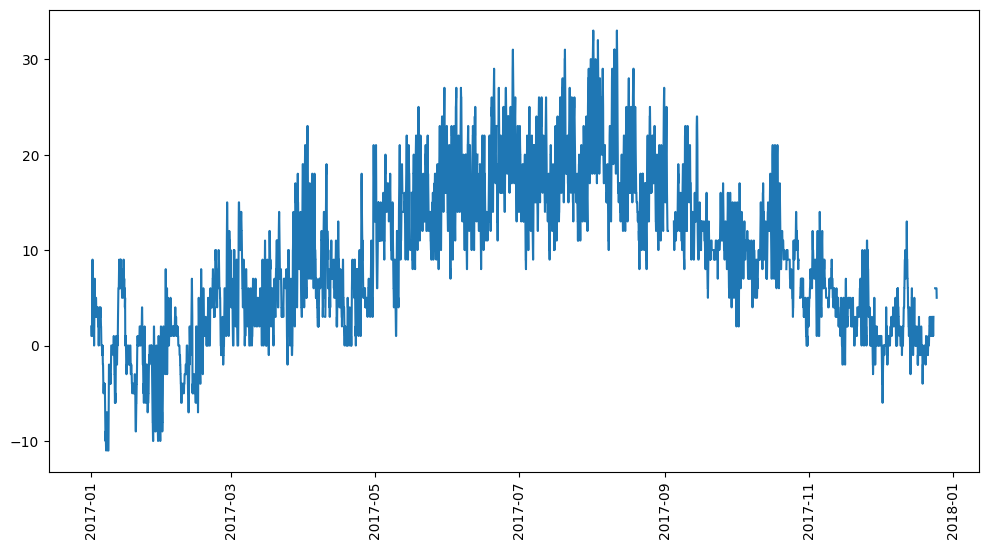

In [104]:
fig, ax = plt.subplots(figsize=(12,6))
plt.locator_params(axis='x', nbins=20)
ax.plot(new_sensor_dict[172]['UTC time'], new_sensor_dict[172]['172_temperature'])
ax.xaxis.set_tick_params(rotation=90)
plt.show()

Czujnik 857 uruchomiony we wrześniu. Dalej ciągłość zapisów. Co w tej sytuacji? 

### Odległości między punktami i wysokość npm 

odległości między punktami- gotowe biblioteki. 

import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print geopy.distance.geodesic(coords_1, coords_2).km

import mpu

Point one
lat1 = 52.2296756
lon1 = 21.0122287

Point two
lat2 = 52.406374
lon2 = 16.9251681

What you were looking for
dist = mpu.haversine_distance((lat1, lon1), (lat2, lon2))
print(dist)  # gives 278.45817507541943.

https://wrf-python.readthedocs.io/en/latest/internal_api/generated/wrf.g_geoht.get_height.html

In [105]:
tutaj spróbować:
https://gis.stackexchange.com/questions/338392/getting-elevation-for-multiple-lat-long-coordinates-in-python

SyntaxError: invalid syntax (758993491.py, line 1)

import rasterio

coords = ((147.363,-36.419), (147.361,-36.430))
elevation = 'srtm_66_20.tif'

with rasterio.open(elevation) as src:
    vals = src.sample(coords)
    for val in vals:
        print(val[0]) #val is an array of values, 1 element 
                      #per band. src is a single band raster 
                      #so we only need val[0]

Do tworzenia wysokości: 

import requests
import urllib
import pandas as pd
 
USGS Elevation Point Query Service
url = r'https://nationalmap.gov/epqs/pqs.php?'
 
coordinates with known elevation 
lat = [48.633, 48.733, 45.1947, 45.1962]
lon = [-93.9667, -94.6167, -93.3257, -93.2755]
 
create data frame
df = pd.DataFrame({
    'lat': lat,
    'lon': lon
})
 
def elevation_function(df, lat_column, lon_column):
    """Query service using lat, lon. add the elevation values as a new column."""
    elevations = []
    for lat, lon in zip(df[lat_column], df[lon_column]):
 
        # define rest query params
        params = {
            'output': 'json',
            'x': lon,
            'y': lat,
            'units': 'Meters'
        }
 
        # format query string and return query value
        result = requests.get((url + urllib.parse.urlencode(params)))
        elevations.append(result.json()['USGS_Elevation_Point_Query_Service']['Elevation_Query']['Elevation'])
 
    df['elev_meters'] = elevations

`elevation_function(df, 'lat', 'lon')`